#Viewing Pretraining Curves

###Mount drive and Authenticate for GCP & Copy tfevents from GCS into drive (If there is new training data to download from GCS)

In [ ]:
from google.colab import auth,drive
print("Mount drive:")
drive.mount('/content/drive', force_remount=True)
DRIVE_PATH="/content/drive/My Drive"
import os
print("Authenticate for GCS:")
auth.authenticate_user()

BUCKET_NAME = "theodore_jiang" #@param{type:"string"}
TFEVENTs_DESTINATION_PATH = "/content/drive/My Drive" #@param{type:"string"}

runs = ["bert_model_modified_loss_spam",
        "bert_model_orig_loss_spam",
        "bert_model_large_loss_spam",
        "bert_model_modified_large_loss_spam",
        "bert_model_modified_medium_loss_spam"]

for run in runs: ##This will copy all of the tfevent files from GCS into drive, and will also delete all of the files from GCS
  cmd = "gsutil -m cp -r \"gs://"+BUCKET_NAME+"/"+run+"\" \""+TFEVENTs_DESTINATION_PATH+"\""
  !{cmd}
  cmd = "gsutil -m rm -r "+"\"gs://"+BUCKET_NAME+"/"+run+"\""
  !{cmd}


  !gsutil -m cp -r $run gs://$BUCKET_NAME

  

###Just mount drive (use this if you wish to only use existing tfevent files from drive)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
DRIVE_PATH = "/content/drive/My Drive"
TFEVENTs_DESTINATION_PATH = "/content/drive/My Drive" #@param{type:"string"}

###Obtain events from tfevents for pretraining and update graph data json


In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import json
from tqdm import tqdm

from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

runs = ["bert_model_modified_loss_spam",
             "bert_model_orig_loss_spam",
             "bert_model_large_loss_spam",
             "bert_model_modified_large_loss_spam",
             "bert_model_modified_medium_loss_spam"]

#@markdown ######only the (skip)-th tfevent file will be considered (useful when amount of tfevent files is more than what is necessary for viewing curves) (if no tfevents should be skipped, set to 1)
skip = 500 #@param {type:"integer"}

def tabulate_events(dpath,out_dict = {}):
    for dname in tqdm(os.listdir(dpath),"converting to dict"):
        if "tfevents" not in dname:
          continue
        ea = EventAccumulator(os.path.join(dpath, dname)).Reload()
        tags = ea.Tags()['scalars']

        for tag in tags:
            tag_values=[]
            wall_time=[]
            steps=[]

            for event in ea.Scalars(tag):
                 if event.step%skip==0 or "eval" in tag:
                    try:
                        out_dict[tag].append((event.step,event.value))
                    except:
                        out_dict[tag] = [(event.step,event.value)]
    return out_dict

graph_data = {}

for run in runs: ##compiles the tfevent files into a json 
                 ##NOTE:DO NOT INTERRUPT THIS PORTION; IT MAY RESULT IN TRAINING GRAPH DATA BEING DELETED 
                 ##(if using google drive and data is deleted, you can always click manage versions in google drive and revert to a previous version on the corresonding .json file) 
  print("Processing tfevents for run:",run)
  data = {}
  if os.path.exists(TFEVENTs_DESTINATION_PATH+"/"+run+"_data.json"):
    data.update(json.load(open(TFEVENTs_DESTINATION_PATH+"/"+run+"_data.json")))
  if os.path.exists(TFEVENTs_DESTINATION_PATH+"/"+run+"/human_pretraining"):
    data = tabulate_events(TFEVENTs_DESTINATION_PATH+"/"+run+"/human_pretraining",data)
    shutil.rmtree(TFEVENTs_DESTINATION_PATH+"/"+run)
    os.makedirs(TFEVENTs_DESTINATION_PATH+"/"+run+"/human_pretraining")
  for metric,datapoints in tqdm(data.items(),"removing data overlaps"): ##remove multiple values with the same step
    new_dps = []
    for i,point in enumerate(datapoints):
      overlap = False
      for j,point2 in enumerate(datapoints[i+1:]):
        if point[0] == point2[0]:
          overlap=True
      if not overlap:
        new_dps.append(point)
    data[metric] = new_dps
  with open(TFEVENTs_DESTINATION_PATH+"/"+run+"_data.json","w+") as f:
    json.dump(data, f)

  for metric,datapoints in tqdm(data.items(),"processing data"):
      try:
          graph_data[metric][run].append(datapoints)
      except:
          try:
              graph_data[metric][run] = [datapoints]
          except:
              graph_data[metric] = {}
              graph_data[metric][run] = [datapoints]
  

    



###Plotting smoothed average curves using matplotlib

nan values found in bert_model_modified_loss_spam: 0
nan values found in bert_model_orig_loss_spam: 1
nan values found in bert_model_large_loss_spam: 0
nan values found in bert_model_modified_large_loss_spam: 0
nan values found in bert_model_modified_medium_loss_spam: 0


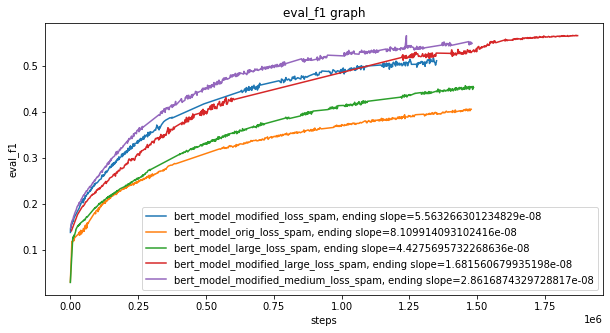

nan values found in bert_model_modified_loss_spam: 0
nan values found in bert_model_orig_loss_spam: 0
nan values found in bert_model_large_loss_spam: 0
nan values found in bert_model_modified_large_loss_spam: 0
nan values found in bert_model_modified_medium_loss_spam: 0


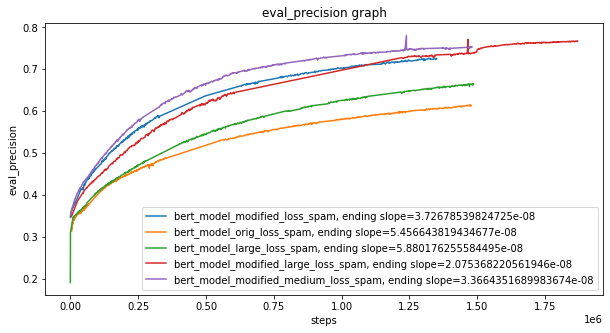

nan values found in bert_model_modified_loss_spam: 0
nan values found in bert_model_orig_loss_spam: 0
nan values found in bert_model_large_loss_spam: 0
nan values found in bert_model_modified_large_loss_spam: 0
nan values found in bert_model_modified_medium_loss_spam: 0


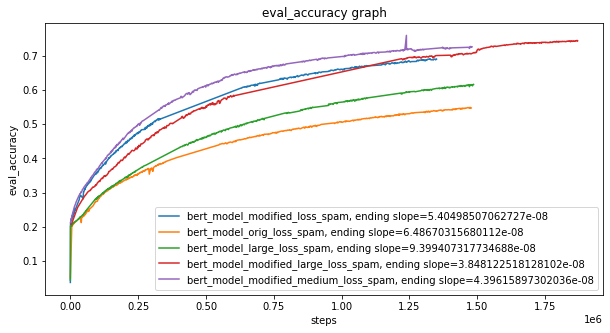

nan values found in bert_model_modified_loss_spam: 0
nan values found in bert_model_orig_loss_spam: 0
nan values found in bert_model_large_loss_spam: 0
nan values found in bert_model_modified_large_loss_spam: 0
nan values found in bert_model_modified_medium_loss_spam: 0


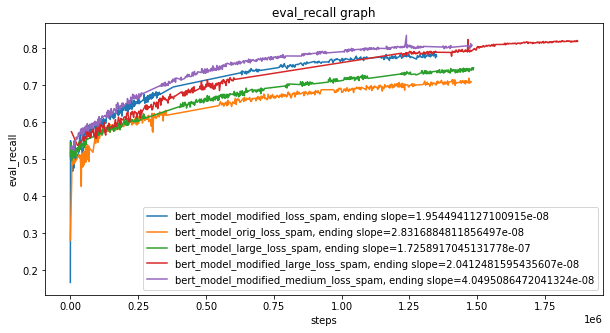

nan values found in bert_model_modified_loss_spam: 0
nan values found in bert_model_orig_loss_spam: 0
nan values found in bert_model_large_loss_spam: 0
nan values found in bert_model_modified_large_loss_spam: 0
nan values found in bert_model_modified_medium_loss_spam: 0


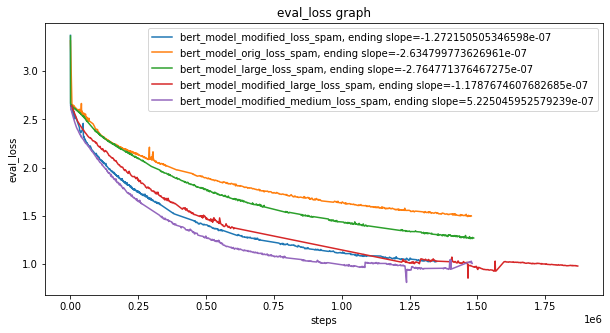

nan values found in bert_model_modified_loss_spam: 0
nan values found in bert_model_orig_loss_spam: 0
nan values found in bert_model_large_loss_spam: 0
nan values found in bert_model_modified_large_loss_spam: 0
nan values found in bert_model_modified_medium_loss_spam: 0


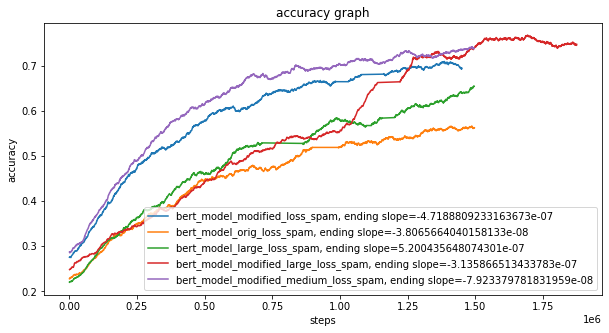

nan values found in bert_model_modified_loss_spam: 0
nan values found in bert_model_orig_loss_spam: 0
nan values found in bert_model_large_loss_spam: 0
nan values found in bert_model_modified_large_loss_spam: 0
nan values found in bert_model_modified_medium_loss_spam: 0


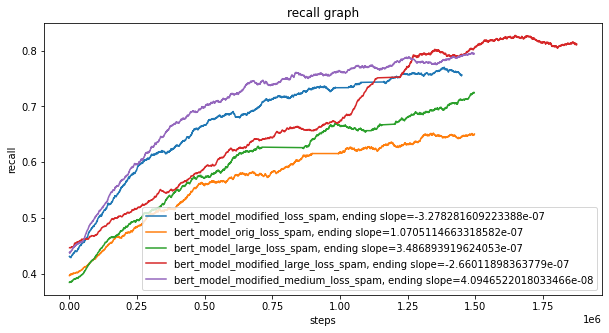

nan values found in bert_model_modified_loss_spam: 0
nan values found in bert_model_orig_loss_spam: 0
nan values found in bert_model_large_loss_spam: 0
nan values found in bert_model_modified_large_loss_spam: 0
nan values found in bert_model_modified_medium_loss_spam: 0


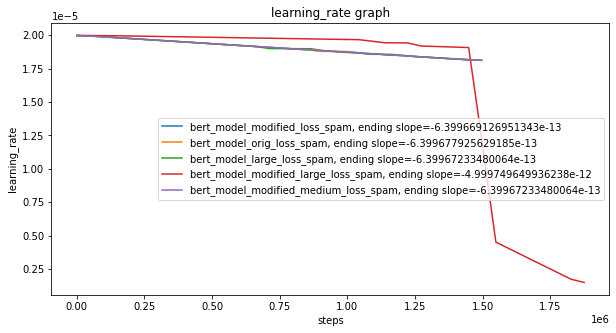

nan values found in bert_model_modified_loss_spam: 0
nan values found in bert_model_orig_loss_spam: 0
nan values found in bert_model_large_loss_spam: 0
nan values found in bert_model_modified_large_loss_spam: 0
nan values found in bert_model_modified_medium_loss_spam: 0


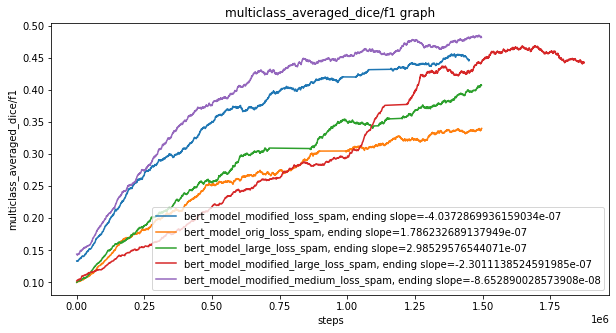

nan values found in bert_model_modified_loss_spam: 0
nan values found in bert_model_orig_loss_spam: 0
nan values found in bert_model_large_loss_spam: 0
nan values found in bert_model_modified_large_loss_spam: 0
nan values found in bert_model_modified_medium_loss_spam: 0


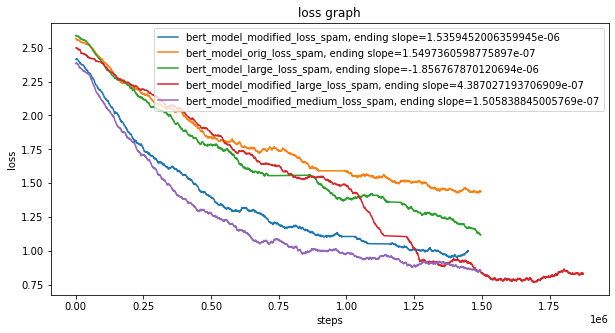

nan values found in bert_model_modified_loss_spam: 0
nan values found in bert_model_orig_loss_spam: 0
nan values found in bert_model_large_loss_spam: 0
nan values found in bert_model_modified_large_loss_spam: 0
nan values found in bert_model_modified_medium_loss_spam: 0


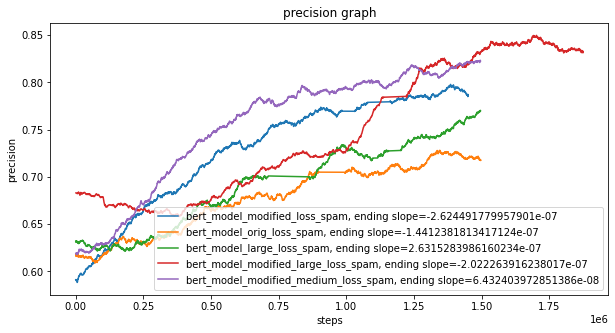

In [ ]:
import matplotlib.pyplot as plt
import math

#@markdown range of the local average for viewing training graphs (to disable local averaging, set it to 0)
avg_range = 100 #@param {type:"integer"}
#@markdown local average range of calculating end slope
slope_avg_range = 30 #@param {type:"integer"}
#@markdown destination path for saving graphs (for no saving set to None)
outfolder = DRIVE_PATH+"/training graphs" #@param
if outfolder and not os.path.exists(outfolder):
  os.makedirs(outfolder)
for metric,runs in graph_data.items():
    if "rando" in metric:
      continue
    plt.figure(figsize=(10,5))
    plt.title(metric+" graph")
    plt.xlabel("steps")
    plt.ylabel(metric)
    for run,run_data in runs.items():
        run_data = run_data[0]
        steps = []
        values = []
        nan = 0
        for datapt in run_data:
            if not math.isnan(datapt[1]):
                values.append(datapt[1])
                steps.append(datapt[0])
            else:
                nan+=1
        print("nan values found in "+run+":",nan)
        values = [x for _, x in sorted(zip(steps, values), key=lambda pair: pair[0])][:-10]

        if "eval" in metric or avg_range == 0:
          avged_values = values
        else:
          avged_values = [sum(values[max(n-avg_range,0):min(n+avg_range,len(values))])/len(values[max(n-avg_range,0):min(n+avg_range,len(values))]) for n,value in enumerate(values)]
        steps = sorted(steps)[:-10]
        ##calculating slopes between two points
        slopes = [((avged_values[n+slope_avg_range]-v)/(steps[n+slope_avg_range]-steps[n])) for n,v in enumerate(avged_values) if n<len(avged_values)-slope_avg_range]

        plt.plot(steps,avged_values,label=run+", ending slope="+str(slopes[-1]))
                
    plt.legend()
    if outfolder:
      plt.savefig(outfolder+"/"+metric.replace("/","_")+".png")
    plt.show()


###Tensorboard viewing (If you wish to use tensorboard instead)

In [ ]:
LOGS_DIR = "/content/drive/My Drive" #@param (type:"string")
LOGS_DIR = "\""+LOGS_DIR+"\""
%load_ext tensorboard
%tensorboard --logdir $LOGS_DIR

#Copy a model checkpoint from GCS to drive

In [ ]:
from google.colab import auth
auth.authenticate_user()

!gsutil -m cp \
"gs://theodore_jiang/bert_model_modified/model.ckpt-1332386.data-00000-of-00001" \ ##replace these with whatever files you are trying to copy from GCS
"gs://theodore_jiang/bert_model_modified/model.ckpt-1332386.index" \               ##alternatively you can copy the entire command from GCS as well
"gs://theodore_jiang/bert_model_modified/model.ckpt-1332386.meta" \
"/content/drive/My Drive/MODIFIED FINALS" ##destionation folder